# Predicting Churn Rate for bank credit card customers to make Informed Business descision

In [1]:
# Loading the relant libraries

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

# Load the Dataset using Pandas

In [3]:
#Create a variable called df and pass the data into it

df =  pd.read_csv ('BankChurners.csv')
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Clean the Data

In [5]:
# We have some columns in the dataset that are not useful for this analysis. We would delete them

In [6]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'CLIENTNUM'], axis=1)

In [8]:
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


# Exploring the Data 

In [9]:
#Using the shape function to get the dimension of the dataset

df.shape

(10127, 20)

In [10]:
# Using the .info method to understand the columns with missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [12]:
#Using the dtypes method to uunderstand the different datatypes in dataset

In [13]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [14]:
# Check the category of available cards to customers

In [15]:
df.Card_Category

0          Blue
1          Blue
2          Blue
3          Blue
4          Blue
          ...  
10122      Blue
10123      Blue
10124      Blue
10125      Blue
10126    Silver
Name: Card_Category, Length: 10127, dtype: object

In [16]:
# Using the Describe function to get insight into the desciptive statistics

In [18]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
# Checking if there is unknown values

In [19]:
unknown_values = (df == 'unknown').any()
print("Columns containing 'unknown':")
print(unknown_values[unknown_values].index.tolist())

Columns containing 'unknown':
[]


In [22]:
# Missing value checks
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Data Preprocessing

In [25]:
# Check the distribution of the target variable

print(df['Attrition_Flag'].value_counts()) 

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


In [26]:
# Encode categorical variables

In [27]:
encoder = LabelEncoder()
# List of categorical columns to encode
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Attrition_Flag']

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Verify that all columns are now numeric
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  int32  
 6   Income_Category           10127 non-null  int32  
 7   Card_Category             10127 non-null  int32  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [28]:
 # Splitting the Dataset into Features (X) and Target (y) and scaling the numerical features

In [29]:
X = df.drop(columns=['Attrition_Flag'])  
y = df['Attrition_Flag']  

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Making the Existing Customer' becomes 0 and 'Attrited Customer' becomes 1.

In [44]:
X = df.drop(columns=['Attrition_Flag'])  # Drop the target column from features
y = df['Attrition_Flag']  # Use the target column

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [46]:
# Visualizing the proportion of attrited customers
# Existing Customer is 0 and Attrited Customer is 1.

C:\Users\Usman\AppData\Local\Temp\ipykernel_19740\1569976794.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition_Flag', data=df, palette='pastel')


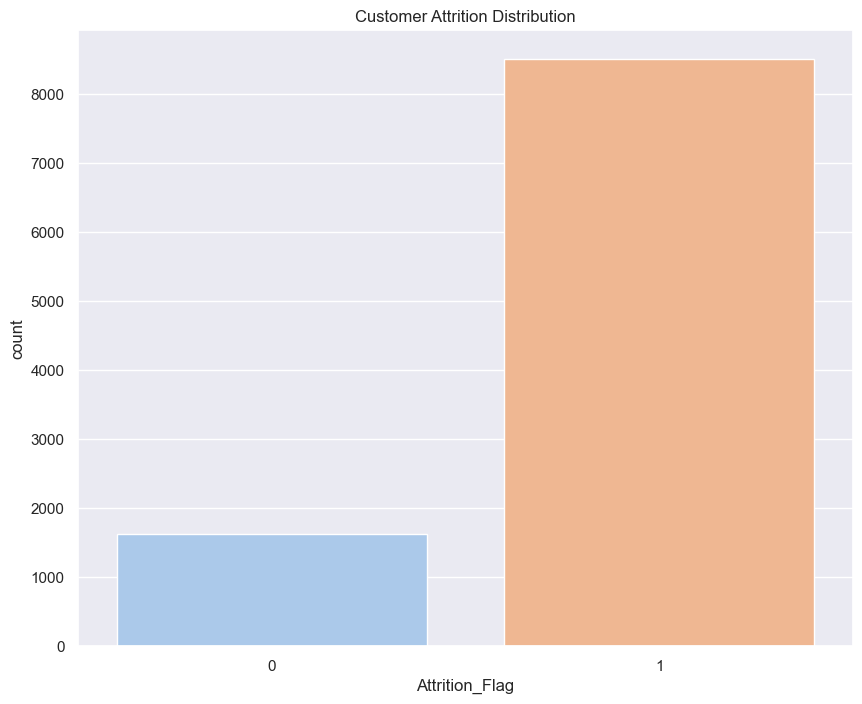

In [67]:
sns.set_theme(style="darkgrid")

# Plot Target Distribution
plt.figure(figsize=(10, 8))
sns.countplot(x='Attrition_Flag', data=df, palette='pastel')
plt.title('Customer Attrition Distribution')
plt.show()

# 0 = Attrited Customer
# 1 = Existing customer

In [48]:
# Visualization a Correlation Heatmap

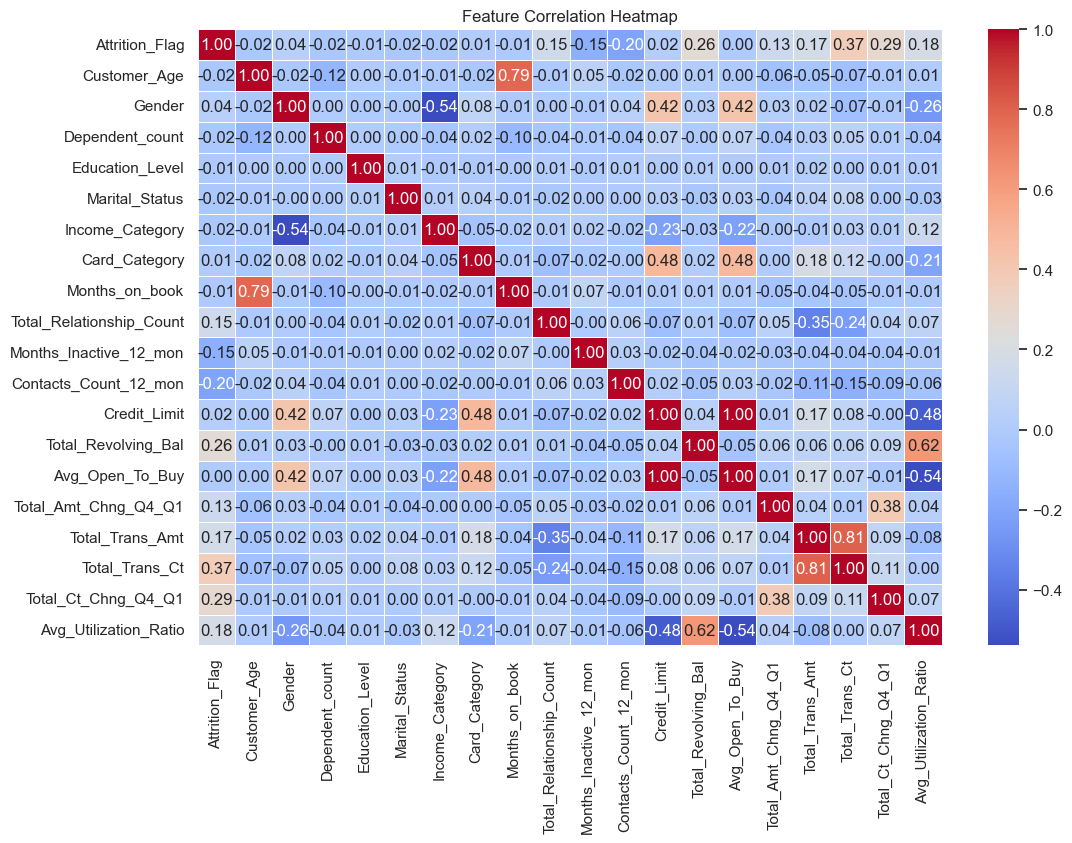

In [49]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Build Predictive Models Using


### Random Forest Classifier: For feature importance and robust performance.

In [51]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [52]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       327
           1       0.97      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



### Logistic Regression: For interpretability.

In [53]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [54]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.54      0.64       327
           1       0.92      0.97      0.94      1699

    accuracy                           0.90      2026
   macro avg       0.85      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026



In [ ]:
## Evaluate using accuracy, precision, recall, and F1-score.

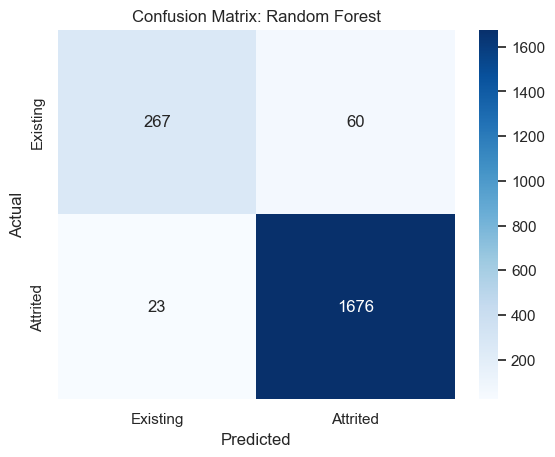

In [55]:
# Confusion Matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Existing', 'Attrited'], yticklabels=['Existing', 'Attrited'])
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [56]:
print(df.describe())

       Attrition_Flag  Customer_Age        Gender  Dependent_count  \
count    10127.000000  10127.000000  10127.000000     10127.000000   
mean         0.839340     46.325960      0.470919         2.346203   
std          0.367235      8.016814      0.499178         1.298908   
min          0.000000     26.000000      0.000000         0.000000   
25%          1.000000     41.000000      0.000000         1.000000   
50%          1.000000     46.000000      0.000000         2.000000   
75%          1.000000     52.000000      1.000000         3.000000   
max          1.000000     73.000000      1.000000         5.000000   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
count     10127.000000    10127.000000     10127.000000   10127.000000   
mean          3.096574        1.463415         2.863928       0.179816   
std           1.834812        0.737808         1.504700       0.693039   
min           0.000000        0.000000         0.000000       0.000000   

### Let's Normnalize the data

In [57]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [60]:
# Identify the numerical columns in your dataset
numerical_columns = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 
    'Total_Relationship_Count', 'Months_Inactive_12_mon', 
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verify the normalized data
print(df.head())

   Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               1      0.404255       1              0.6                3   
1               1      0.489362       0              1.0                2   
2               1      0.531915       1              0.6                2   
3               1      0.297872       0              0.8                3   
4               1      0.297872       1              0.6                5   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               1                2              0        0.604651   
1               2                4              0        0.720930   
2               1                3              0        0.534884   
3               3                4              0        0.488372   
4               1                2              0        0.186047   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                       0.8                0

In [61]:
df.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,0.432467,0.470919,0.469241,3.096574,1.463415,2.863928,0.179816,0.533219,0.562516,0.390195,0.409220,0.217477,0.461984,0.216328,0.223709,0.216651,0.425261,0.191767,0.275169
std,0.367235,0.170571,0.499178,0.259782,1.834812,0.737808,1.504700,0.693039,0.185731,0.310882,0.168437,0.184371,0.274771,0.323793,0.263399,0.064530,0.189002,0.181958,0.064105,0.275967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.319149,0.000000,0.200000,2.000000,1.000000,2.000000,0.000000,0.418605,0.400000,0.333333,0.333333,0.033760,0.142630,0.038290,0.185752,0.091549,0.271318,0.156704,0.023023
50%,1.000000,0.425532,0.000000,0.400000,3.000000,1.000000,3.000000,0.000000,0.534884,0.600000,0.333333,0.333333,0.094042,0.506953,0.100571,0.216662,0.188550,0.441860,0.189015,0.176176
75%,1.000000,0.553191,1.000000,0.600000,5.000000,2.000000,4.000000,0.000000,0.627907,0.800000,0.500000,0.500000,0.291109,0.708780,0.285574,0.252870,0.235396,0.550388,0.220248,0.503504
max,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
## Build the model again

In [63]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [64]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       327
           1       0.97      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [65]:
#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [66]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.54      0.64       327
           1       0.92      0.97      0.94      1699

    accuracy                           0.90      2026
   macro avg       0.85      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026



## Building an Artificial Neural Network to predict Customer Churn using the Bank Churners Dataset

In [69]:
#Import the relenant libraries

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
# Load the dataset
df1 = pd.read_csv ('BankChurners.csv')
df1.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


In [74]:
#dROP Unwanted columns

df1 = df1.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'CLIENTNUM'], axis=1)
df1.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [106]:
# Encode Categorical Data

categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 
                       'Income_Category', 'Card_Category', 'Attrition_Flag']
encoder = LabelEncoder()

for col in categorical_columns:
    df1[col] = encoder.fit_transform(df[col])

In [110]:
# Separate Features and Target
X = df1.drop(columns=['Attrition_Flag'])  # Features
y = df1['Attrition_Flag']  # Target

In [111]:
#  Split the Data into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
#  Normalize Numerical Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
# Build the ANN
model = Sequential()

# Input layer
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))

# Hidden layers
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))

# Output layer (Binary classification: Attrited vs Existing Customer)
model.add(Dense(units=1, activation='sigmoid'))

In [114]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [116]:
# Train the Model
history = model.fit(X_train, y_train, epochs=40, batch_size=30, validation_split=0.2, verbose=1)

Epoch 1/40
216/216 [==============================] - 0s 1ms/step - loss: 0.1223 - accuracy: 0.9525 - val_loss: 0.1833 - val_accuracy: 0.9365
Epoch 2/40
216/216 [==============================] - 0s 982us/step - loss: 0.1218 - accuracy: 0.9522 - val_loss: 0.1847 - val_accuracy: 0.9315
Epoch 3/40
216/216 [==============================] - 0s 986us/step - loss: 0.1219 - accuracy: 0.9522 - val_loss: 0.1856 - val_accuracy: 0.9352
Epoch 4/40
216/216 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9523 - val_loss: 0.1874 - val_accuracy: 0.9371
Epoch 5/40
216/216 [==============================] - 0s 972us/step - loss: 0.1194 - accuracy: 0.9514 - val_loss: 0.1813 - val_accuracy: 0.9340
Epoch 6/40
216/216 [==============================] - 0s 978us/step - loss: 0.1184 - accuracy: 0.9523 - val_loss: 0.1822 - val_accuracy: 0.9377
Epoch 7/40
216/216 [==============================] - 0s 981us/step - loss: 0.1187 - accuracy: 0.9540 - val_loss: 0.1782 - val_accuracy: 0.9

In [117]:
#  Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.92


In [119]:
#  Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

64/64 [==============================] - 0s 492us/step


In [121]:
#Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                320       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 737 (2.88 KB)
Trainable params: 737 (2.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Evaluating the model

In [123]:
#  Make Predictions
y_pred_proba = model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions (threshold = 0.5)


64/64 [==============================] - 0s 524us/step


In [126]:
#  Calculate Metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.92
Precision: 0.94
Recall: 0.97
F1 Score: 0.96
AUC-ROC: 0.95


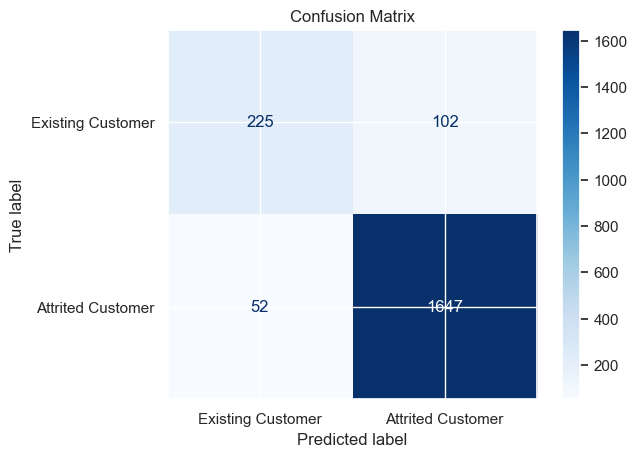

In [127]:
#  Generate a Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Existing Customer", "Attrited Customer"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

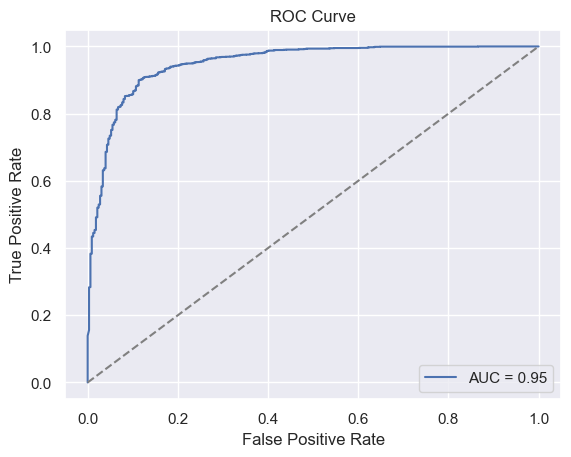

In [130]:
# Plot ROC Curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random model)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [131]:
# Lets Handle Class Imbalance